# **Fake News Detection**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from nltk.stem import SnowballStemmer
import nltk
import matplotlib as matpl
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BARATHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Loading data from CSV Files
fake_dataframe = pd.read_csv("Fake_ds.csv")
true_dataframe = pd.read_csv("True_ds.csv")

In [3]:
#Labelling true and fake news as 0 and 1
fake_dataframe["class"] = 0
true_dataframe["class"] = 1

In [4]:
fake_dataframe.shape, true_dataframe.shape

((23481, 5), (21417, 5))

In [5]:
#removing some data for manual testing
df_fake_manual_testing = fake_dataframe.tail(10)
for i in range(23480,23470,-1):
    fake_dataframe.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = true_dataframe.tail(10)
for i in range(21416,21406,-1):
    fake_dataframe.drop([i], axis = 0, inplace = True)

In [6]:
fake_dataframe.shape, true_dataframe.shape

((23461, 5), (21417, 5))

In [7]:
#merging both fake and true dataframes
df_merge = pd.concat([fake_dataframe,true_dataframe], axis =0 )
df_merge.head(10)
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [8]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [9]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [10]:
#shuffling data
df = df.sample(frac = 1)

<AxesSubplot:>

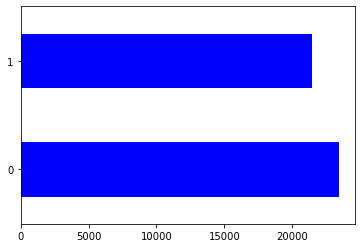

In [11]:
#data visualization 
df['class'].value_counts().plot(kind = "barh",color="blue")

In [12]:
# adding length column to count the numer of words
df['length'] = df['text'].apply(len)
df.head()

,text,class,length
14755,Who would ve guessed? A coalition of U.S.-base...,0,1985
22428,Shawn Helton 21st Century WireIn the wake of ...,0,13440
8303,There s been a meme spreading across social me...,0,2340
2629,The GOP likes to pretend that they have no iss...,0,3326
4093,WASHINGTON (Reuters) - U.S. President Donald T...,1,5488


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

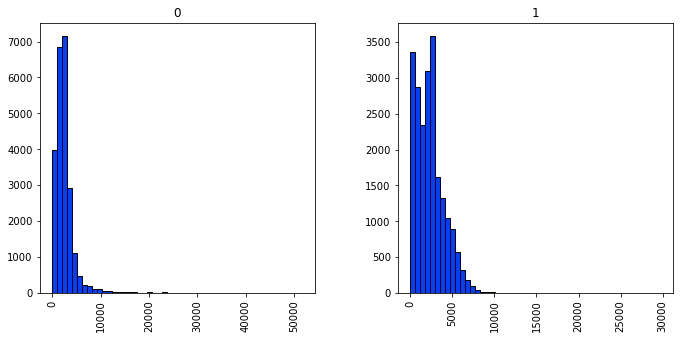

In [13]:
# visualizing data length
matpl.rcParams['patch.force_edgecolor'] = True
plot.style.use('seaborn-bright')
df.hist(column='length', by='class', bins=50,figsize=(11,5))

In [14]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [15]:
df.columns

Index(['text', 'class', 'length'], dtype='object')

In [16]:
df.head()

,text,class,length
0,Who would ve guessed? A coalition of U.S.-base...,0,1985
1,Shawn Helton 21st Century WireIn the wake of ...,0,13440
2,There s been a meme spreading across social me...,0,2340
3,The GOP likes to pretend that they have no iss...,0,3326
4,WASHINGTON (Reuters) - U.S. President Donald T...,1,5488


In [17]:
#Preprocessing the data
#removing unwanted texts,spaces, and converting all alphabets to lower case
def wordopt(word):
    word = word.lower()
    word = re.sub('\[.*?\]', '', word)
    word = re.sub("\\W"," ",word) 
    word = re.sub('https?://\S+|www\.\S+', '', word)
    word = re.sub('<.*?>+', '', word)
    word = re.sub('[%s]' % re.escape(string.punctuation), '', word)
    word = re.sub('\n', '', word)
    word = re.sub('\w*\d\w*', '', word)    
    return word

In [18]:
df["text"] = df["text"].apply(wordopt)

In [19]:
#defining x (feature) and y(target) for dataset splitting
x = df["text"]
y = df["class"]

In [20]:
#Data Set Preperation
# splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [21]:
#vectorizing the data and converting the data to sparse matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

In [22]:
#implementing all machine learning models

#1 Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier

#2 Decision Tree Classifier
DT = DecisionTreeClassifier()

#3 Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)

#4 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)

In [23]:
clfs = {'LR':LR,'DT':DT,'GBC':GBC,'RFC':RFC}

In [24]:
# function to train data
def train_classifier(clf, train_dataset, train_values):    
    clf.fit(train_dataset, train_values)

In [25]:
# function to predict data
def predict_labels(clf, test):
    return (clf.predict(test))

In [26]:
# looping through algorithms
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, xv_train, y_train)
    pred = predict_labels(v,xv_test)
    pred_scores.append((k, accuracy_score(y_test,pred)))

In [27]:
df1 = pd.DataFrame(pred_scores,columns=['Algorithm','Score'])
df1

,Algorithm,Score
0,LR,0.986542
1,DT,0.995900
2,GBC,0.995098
3,RFC,0.988681


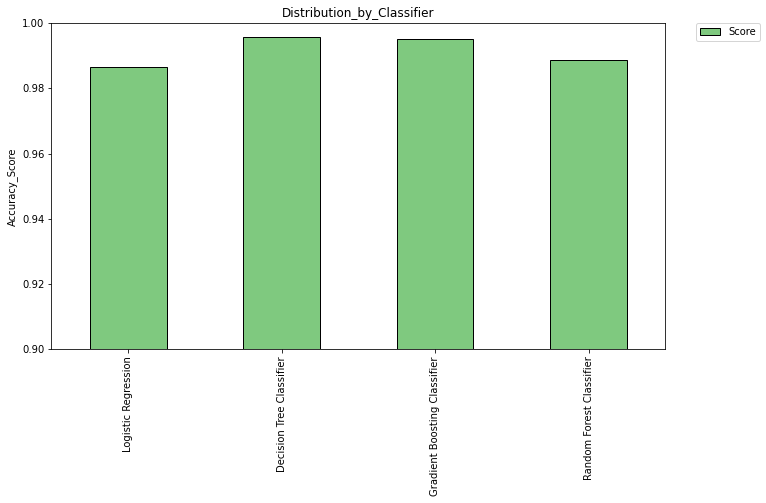

In [28]:
#visualization for df1
df1.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plot.xticks(np.arange(4), ['Logistic Regression','Decision Tree Classifier','Gradient Boosting Classifier','Random Forest Classifier'])
plot.ylabel('Accuracy_Score')
plot.title('Distribution_by_Classifier')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# stemming using SnowballStemmer 
def stemmer (word):
    word = word.split()
    words = ""
    for i in word:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [29]:
df3=df

In [ ]:
df3["text"] = df3["text"].apply(stemmer)

In [30]:
x = df3["text"]
y = df3["class"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
xv_train = vect.fit_transform(x_train)
xv_test = vect.transform(x_test)

In [33]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, xv_train, y_train)
    pred = predict_labels(v,xv_test)
    pred_scores.append((accuracy_score(y_test,pred)))

In [34]:
df2 = pd.DataFrame(pred_scores,columns=['Score2'])
df4 = pd.concat([df1,df2],axis=1)
df4

,Algorithm,Score,Score2
0,LR,0.986542,0.987255
1,DT,0.995900,0.997237
2,GBC,0.995098,0.995365
3,RFC,0.988681,0.991266


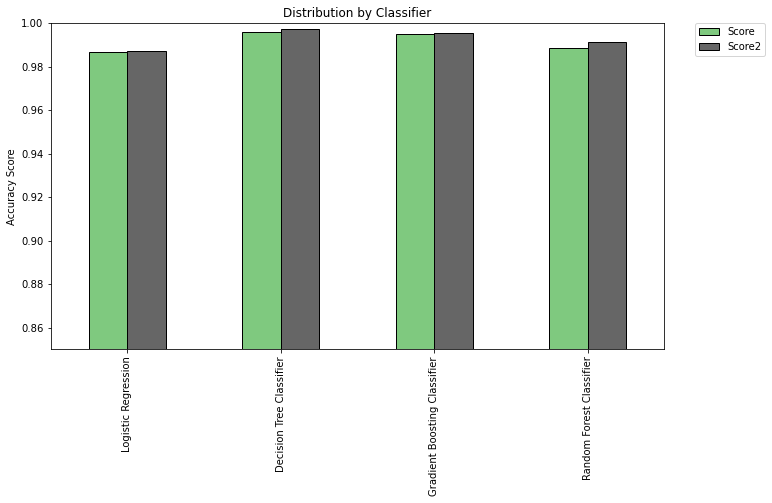

In [35]:
#visualization after stemming
df4.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plot.xticks(np.arange(4),['Logistic Regression','Decision Tree Classifier','Gradient Boosting Classifier','Random Forest Classifier'] )
plot.ylabel('Accuracy Score')
plot.title('Distribution by Classifier')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h1><center>2. Confusion Matrices for all the classifiers</center></h1>

In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
cm_lr=confusion_matrix(y_test,pred_lr)
cm_lr

array([[5808,   68],
       [  75, 5269]], dtype=int64)

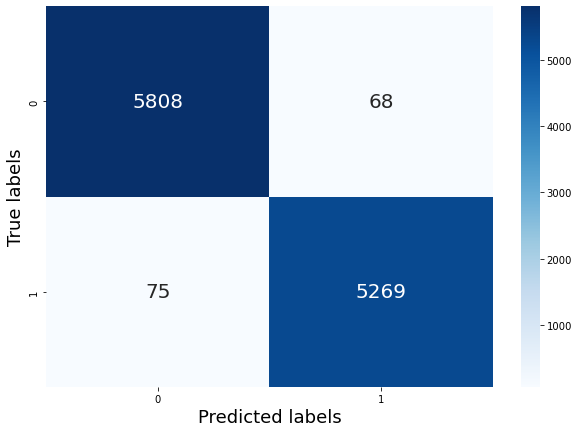

In [39]:
import seaborn as sns
plot.figure(figsize=(10,7))
ax= plot.subplot()
sns.heatmap(cm_lr, annot=True,cmap='Blues',annot_kws={"size":20},fmt="d",ax=ax)
ax.set_xlabel('Predicted labels',fontsize='18');ax.set_ylabel('True labels',fontsize='18'); 
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

In [40]:
print("Score of Logistic Regression:",LR.score(xv_test, y_test))

Score of Logistic Regression: 0.9872549019607844


In [41]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5344

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [42]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [43]:
pred_dt = DT.predict(xv_test)

In [44]:
print("Desicision Tree Classifier Score:",DT.score(xv_test, y_test))

Desicision Tree Classifier Score: 0.9971479500891266


In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5876
           1       1.00      1.00      1.00      5344

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [46]:
cm_dt=confusion_matrix(y_test,pred_dt)
cm_dt

array([[5863,   13],
       [  19, 5325]], dtype=int64)

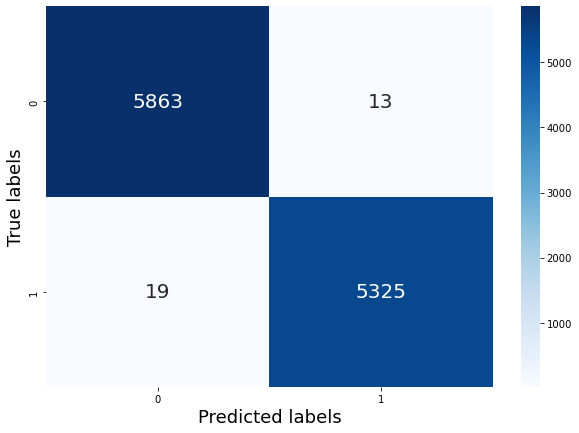

In [47]:
import seaborn as sns
plot.figure(figsize=(10,7))
ax= plot.subplot()
sns.heatmap(cm_dt, annot=True,cmap='Blues',annot_kws={"size":20},fmt="d",ax=ax)
ax.set_xlabel('Predicted labels',fontsize='18');ax.set_ylabel('True labels',fontsize='18'); 
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [49]:
pred_gbc = GBC.predict(xv_test)

In [50]:
GBC.score(xv_test, y_test)

0.9953654188948307

In [51]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5876
           1       0.99      1.00      1.00      5344

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [52]:
cm_gbc=confusion_matrix(y_test,pred_gbc)
cm_gbc

array([[5845,   31],
       [  21, 5323]], dtype=int64)

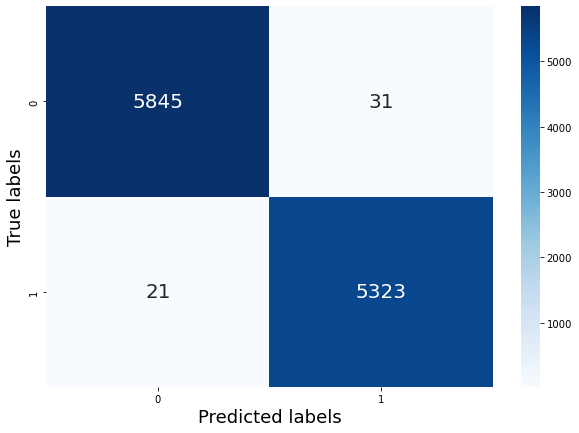

In [53]:
import seaborn as sns
plot.figure(figsize=(10,7))
ax= plot.subplot()
sns.heatmap(cm_gbc, annot=True,cmap='Blues',annot_kws={"size":20},fmt="d",ax=ax)
ax.set_xlabel('Predicted labels',fontsize='18');ax.set_ylabel('True labels',fontsize='18'); 
#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

In [54]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
pred_rfc = RFC.predict(xv_test)

In [56]:
RFC.score(xv_test, y_test)

0.99126559714795

In [57]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5876
           1       0.99      0.99      0.99      5344

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [58]:
cm_rfc=confusion_matrix(y_test,pred_rfc)
cm_rfc

array([[5837,   39],
       [  59, 5285]], dtype=int64)

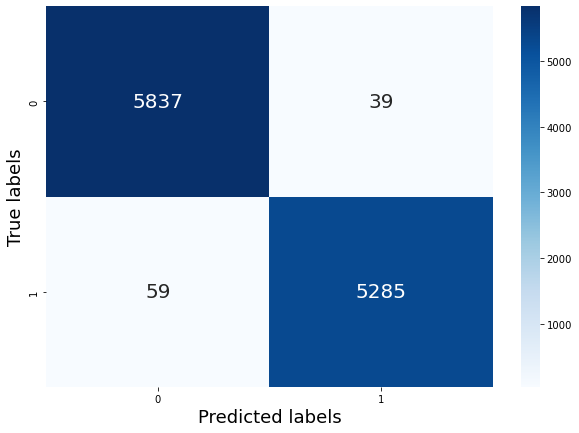

In [59]:
import seaborn as sns
plot.figure(figsize=(10,7))
ax= plot.subplot()
sns.heatmap(cm_rfc, annot=True,cmap='Blues',annot_kws={"size":20},fmt="d",ax=ax)
ax.set_xlabel('Predicted labels',fontsize='18');ax.set_ylabel('True labels',fontsize='18'); 

<h1><center>3. Parameter Tuning</center></h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pred_scores = []
for i in range(2,10):
    dtc = DecisionTreeClassifier(min_samples_split=i, random_state=111)
    dtc.fit(xv_train,y_train)
    pred = dtc.predict(xv_test)
    pred_scores.append((i, accuracy_score(y_test,pred)))
pred_scores


In [ ]:
df6 = pd.DataFrame(pred_scores, columns=['Index','Score'])
df6.plot(figsize=(11,6))

In [ ]:
slvr = {'newton-cg' : 'newton-cg', 'lbfgs': 'lbfgs', 'liblinear': 'liblinear', 'sag': 'sag'}
pred_scores = []
for k,v in slvr.items():
    lrc = LogisticRegression(solver=v, penalty='l2')
    lrc.fit(xv_train,y_train)
    pred = lrc.predict(xv_test)
    pred_scores.append((k, accuracy_score(y_test,pred)))
df = pd.DataFrame(pred_scores, columns=['index','Score'])
df.plot(figsize=(11,6))

In [ ]:
parameters = {
    "n_estimators":[5,50],
    "max_depth":[1,3],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(GBC,parameters,cv=5)
cv.fit(xv_train, y_train.values.ravel())

<h1><center>4. Manual Testing</center></h1>

In [60]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vect.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [61]:
news = str(input())
manual_testing(news)

 	text 21395	HONG KONG (Reuters) - Typhoon Hato, a maximum category 10 storm, slammed into Hong Kong on Wednesday lashing the Asian financial hub with wind and rain that uprooted trees and forced most businesses to close, while in some places big waves flooded seaside streets. There were reports of 34 people injured in Hong Kong while in the city of Macau, across the Pearl River estuary, three people were killed, authorities there said. In Hong Kong, more than 450 flights were canceled, financial markets suspended and schools closed as Hato bore down, the first category 10 storm to hit the city since 2012.  I ve never seen one like this,  Garrett Quigley, a longtime resident of Lantau island to the west of the city, said of the storm.  Cars are half submerged and roads are impassable with flooding and huge trees down. It s crazy.   Many skyscrapers in the usually teeming streets of Hong Kong were empty and dark as office workers stayed at home. Hato, that means  sky pigeon  in Japanese



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
